This is the Juypter Notebook for Joe McGrath's submission for the Udacity Machine Learning Engineer nanodegree program.
This file contains the relevant code-blocks, assiocated comments and visual aids to be used in conjunction with the written PDF piece.


In [1]:
##Importing initial libs in order to handle and process data tables.
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
#import visuals as vs
%matplotlib inline
#Plotting libaries
#Machine Learning libaries 
from sklearn.model_selection import train_test_split


In [2]:
#Additional code block for defining functions
#Importing the scoring functions we plan on using in this project
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score

# Training func - This function is used to take a model and train it.
#@train -array[]- Training data
#@res -array[]- Result data
#@model - model object - A model object which is to be used for training
#@add - array[] - Additional parameters to pass if required
def trainer(train,res,model,add):
    #Note start time
    st=time.time()
    if 0<len(add):
        model.fit(train,res, add)
    else:
        model.fit(train,res)
    #Note time taken to train model
    timeTaken=time.time()-st
    print("Time taken to fit model - "+str(timeTaken))
    return model

# Performance Metric - A function to measure the performance of our model
#@y_true - array[] - Actual values
#@y_predict - array[] - Predicted values
def performance_metric(y_true, y_predict):
    #Running the performance metrics on the results and predicitions
    Rscore = r2_score(y_true, y_predict)
    mse=mean_squared_error(y_predict,y_true)
    print("R^2 Score is "+str(Rscore))
    print("MSE Score is "+str(mse))

# Testing func - Function which predicts results and then measures the performance
#@results - array[] - Actual values
#@inputData - array[] - Feature data to predict results from 
#@model - model object - Model to predict results
def testFunc(results, inputData, model):
    #Note start time
    st=time.time()
    predicts = model.predict(inputData)
    #Note time taken to test model
    timeTaken =time.time()-st
    print("Time taken to predict results - "+str(timeTaken))
    performance_metric(results, predicts)

In [5]:
from sklearn.model_selection import train_test_split
#Importing out dataset
data = pd.read_csv('data/train.csv')
data = pd.DataFrame(data)

#Summary statistics
#Target variables
#Double [[]] wrapping ensure stays as pandas dataframe
targData=data[['critical_temp']]
#Feature variables
#Dropping the target variables from the data-set
featData=data.drop(['critical_temp'],axis=1)
##Such that we are left with only the extracted features from the material properties
featData=featData.drop(['number_of_elements'],axis=1)
#featData.describe().transpose()
#break
#Data Transformation
#Applying lograthmic and Scaling to the data-set prior to training/testing
#Applying lograthmic transformation to the data-set
cols=list(featData)
featData[cols] = featData[cols].apply(lambda x: np.log(x + 1))
featData.describe().transpose()
# Visualize the new log distributions
#vs.distribution(features_log_transformed, transformed = True)

#Applying a scaler to the data-set in order to normalise the date (0,1)
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledData=pd.DataFrame(data=featData)
scaledData.head()
scaledData[cols]=scaler.fit_transform(scaledData[cols])
#scaledData.describe().transpose()

#Splitting data
# Training/Test data
X_train, X_test, y_train, y_test = train_test_split(scaledData, targData, test_size=0.20, random_state=42)

X_train_true=X_train
y_train_true=y_train
X_train_true.shape
y_train_true.shape

(17010, 1)

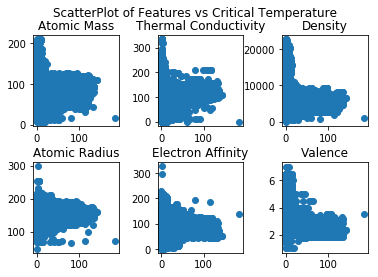

In [ ]:
from pandas.tools.plotting import bootstrap_plot
#bootstrap_plot(targData, size=50,  color='grey')
##ScatterPlot Matrix##
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Atomic Mass')
plt.scatter(targData,featData['mean_atomic_mass'])
plt.subplot(2,3,2)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Thermal Conductivity')
plt.scatter(targData,featData['mean_ThermalConductivity'])
plt.subplot(2,3,3)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Density')
plt.scatter(targData,featData['mean_Density'])
plt.subplot(2,3,4)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Atomic Radius')
plt.scatter(targData,featData['mean_atomic_radius'])
plt.subplot(2,3,5)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Electron Affinity')
plt.scatter(targData,featData['mean_ElectronAffinity'])
plt.subplot(2,3,6)
plt.subplots_adjust(hspace=0.4, wspace=0.45)
plt.title('Valence')
plt.scatter(targData,featData['mean_Valence'])
plt.suptitle('ScatterPlot of Features vs Critical Temperature')
plt.show()
plt.gcf().clear()
##Histogram##
plt.hist(targData, 20, facecolor='blue')
plt.show()


In [ ]:
#Lasso Regression -- Feature selection
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
print("Lasso Regression Model")
##Lasso Regression

#clf = linear_model.Lasso(random_state=42)
print("Applying GridSearchCV to the model")
#Using GridSearchCV to optimise the parameters for the model
#Parameters we are looking to optimise
param_dict = {"alpha":[0.9,0.7,0.5,0.3,0.1,0.01],
             "selection":['cyclic','random'],
             "max_iter":[1000,1500,2500,5000]}

###Creating GridSearchCV Object
#clf_gsvObj=GridSearchCV(clf,param_grid=param_dict,scoring='mean_squared_error')

#trainer(X_train_true,y_train_true,clf_gsvObj,[])
#print(clf_gsvObj.best_estimator_)
##Result of the best_estimator shoewn below - This to be used for training the models. 
clf = linear_model.Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
trainer(X_train_true,y_train_true,clf,[])

print("Recursive Feature Selection (Cross-Validation) - Feature Elimination")
##Using the Recursive Feature Selection Approach with Cross-Validation##
#model_select_RFECV=RFECV(clf_gsvObj.best_estimator_)
model_select_RFECV=RFECV(clf)
#model_select_RFECV=RFECV(clf)
trainer(X_train_true,y_train_true,model_select_RFECV,[])


Lasso Regression Model
Applying GridSearchCV to the model
Time taken to fit model - 6.401323318481445
Recursive Feature Selection (Cross-Validation) - Feature Elimination


/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
import matplotlib.pyplot as plt
#clf_gsvObj.best_estimator_.__dict__

model_select_RFECV.__dict__




{'cv': None,
 'estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
    normalize=False, positive=False, precompute=False, random_state=42,
    selection='cyclic', tol=0.0001, warm_start=False),
 'estimator_': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=2500,
    normalize=False, positive=False, precompute=False, random_state=42,
    selection='cyclic', tol=0.0001, warm_start=False),
 'grid_scores_': array([0.03757118, 0.19744314, 0.24821356, 0.4250213 , 0.44745245,
        0.53154019, 0.55891775, 0.56248727, 0.58151129, 0.59039867,
        0.61398994, 0.62088735, 0.62412442, 0.62454448, 0.63306623,
        0.63815523, 0.64341707, 0.64558485, 0.64924535, 0.65098115,
        0.65311822, 0.65702629, 0.659267  , 0.6630539 , 0.66765322,
        0.66842517, 0.67157357, 0.67262508, 0.67360428, 0.67364829,
        0.6775811 , 0.68012165, 0.68015901, 0.68125727, 0.68232465,
        0.68341538, 0.6842358 , 0.68431701, 0.68465732, 0.68542539,
        0.68

In [7]:
##Using the Select From Model Approach##
#print(X_train.columns[model_select.get_support()])
##Using the Recursive Feature Selection Approach##
#print(X_train.columns[model_select_rfe.get_support()])
##Using the Recursive Feature Selection Approach with Cross-Validation##
X_train.columns[model_select_RFECV.get_support()]
#model_select_RFECV.transform(X_train_true)

##Show below is the features selected following the Lasson Regression Feature Selection approach being taken

Index(['mean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass',
       'wtd_mean_fie', 'gmean_fie', 'wtd_entropy_fie', 'range_fie',
       'wtd_range_fie', 'wtd_std_fie', 'wtd_mean_atomic_radius',
       'gmean_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius',
       'std_atomic_radius', 'mean_Density', 'gmean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'wtd_range_Density', 'std_Density',
       'wtd_std_Density', 'mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'entropy_FusionHeat',
       'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity',
   

In [8]:
#transforming the data as per the selected features
model_select_RFECV.transform(X_train)

array([[0.69817561, 0.67626999, 0.44090193, ..., 0.69045367, 0.        ,
        0.        ],
       [0.78944023, 0.63523485, 0.69143058, ..., 0.2827983 , 0.        ,
        0.        ],
       [0.68658015, 0.585801  , 0.82109308, ..., 0.34878797, 0.24271341,
        0.17040608],
       ...,
       [0.76263177, 0.59796395, 0.80824173, ..., 0.33254547, 0.24271341,
        0.17176031],
       [0.75297657, 0.59825129, 0.709538  , ..., 0.34704346, 0.43558914,
        0.29518438],
       [0.83065238, 0.83907476, 0.66445854, ..., 0.65479854, 0.58407041,
        0.65605055]])

In [22]:
#Creation of benchmark linear SVM
#As suggested in Capstone Proposal feedback, it was propsed to create a
#benchmark model in order to guage how the models
#Importing required models from sklearn
from sklearn import svm
clf_svm=svm.SVR(C=1.0, kernel="linear", epsilon=0.3)
###Creating GridSearchCV Object
param_dict_clf_svm={"kernel":["linear","poly","rbf","sigmoid"],
                   "C":[1.0,0.67,0.33],
                   "epsilon":[0.1,0.2,0.3]}

#clf_svm_gsvObj=GridSearchCV(clf_svm,param_grid=param_dict_clf_svm,scoring='mean_squared_error')
clf_svm_gsvObj=clf_svm
#Fiting the GridSearchCV Object to the training data
trainer(X_train_true,y_train_true,clf_svm_gsvObj,[])
#print(clf_svm_gsvObj.best_estimator_)

#Training the model
print("Training the model on the Training Data-set")
#trainer(X_train_true,y_train_true,clf_svm_gsvObj.best_estimator_,[])
trainer(X_train_true,y_train_true,clf_svm_gsvObj,[])
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,X_test,clf_svm_gsvObj)

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken to fit model - 52.77989602088928
Training the model on the Training Data-set
Time taken to fit model - 52.848797082901
Running the model on the Validation Data-set
Time taken to predict results - 5.963982105255127
R^2 Score is 0.64328882985425
MSE Score is 423.7060307741928
Running the model on the Testing Data-set
Time taken to predict results - 8.535955667495728
R^2 Score is 0.6652500684105426
MSE Score is 385.32410320663183


In [22]:
#Importing required models from sklearn
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
#Model parameter evaluation functions
from sklearn.model_selection import GridSearchCV
#Training the models
#Random Forest
#clf_rf=RandomForestRegressor(criterion="mse",random_state=42,max_depth=25,n_estimators=1000,min_samples_split=4,max_features="sqrt")
#clf_rf=RandomForestRegressor(criterion="mse",random_state=42)

###Creating GridSearchCV Object
param_dict_clf_rf={"max_depth":[5, 10, 15, 25, 50],
                  "n_estimators":[100,250,500],
                  "min_samples_split":[2,4,8],
                  "max_features":["auto", "sqrt"]}


#clf_svm_clf_rf=GridSearchCV(clf_rf,param_grid=param_dict_clf_rf,scoring='mean_squared_error')
#Fiting the GridSearchCV Object to the training data
#trainer(X_train_true,y_train_true.values.ravel(),clf_svm_clf_rf,[])
print(clf_svm_clf_rf.best_estimator_)

#RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           #max_features='sqrt', max_leaf_nodes=None,
           #min_impurity_decrease=0.0, min_impurity_split=None,
           #min_samples_leaf=1, min_samples_split=2,
           #min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           #oob_score=False, random_state=42, verbose=0, warm_start=False)

#Training the model
print("Training the model on the Training Data-set")
trainer(model_select_RFECV.transform(X_train_true),y_train_true.values.ravel(),clf_svm_clf_rf.best_estimator_,[])
#trainer(model_select_RFECV.transform(X_train_true),y_train_true,clf_rf,[])
#Testing the model on the test set
#print("Running the model on the Testing Data-set")
testFunc(y_test,model_select_RFECV.transform(X_test),clf_svm_clf_rf.best_estimator_)
#testFunc(y_test,model_select_RFECV.transform(X_test),clf_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the model on the Training Data-set


/home/jmcgrath/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Time taken to fit model - 53.309325218200684
Time taken to predict results - 0.7760372161865234
R^2 Score is 0.9298558494685276
MSE Score is 80.74156063421819


In [56]:
#Neural Network
from sklearn import preprocessing
from keras import models
from keras import layers
from keras import regularizers

# Start neural network
##https://chrisalbon.com/deep_learning/keras/feedforward_neural_network_for_regression/
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
##Input layer##
#network.add(layers.Dense(units=model_select_RFECV.transform(X_train).shape[1], activation='linear', input_shape=(model_select_RFECV.transform(X_train).shape[1],)))
network.add(layers.Dense(units=300, activation='linear', input_shape=(model_select_RFECV.transform(X_train).shape[1],)))

##Hiden layers##
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=150, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
network.add(layers.Dense(units=50, activation='relu',kernel_regularizer=regularizers.l2(0.05)))

##Output layer##
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

##Compile the model##
network.compile(loss='mse',optimizer='Adam')

##Summary of the Model Archtecture##
network.summary()
##Fitting the model to the training data-set##
#Training the model
print("Training the model on the Training Data-set")
network.fit(model_select_RFECV.transform(X_train_true), y_train_true, epochs=5000,batch_size=50)
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,model_select_RFECV.transform(X_test),network)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 300)               15300     
_________________________________________________________________
dense_40 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_41 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 51        
Total params: 68,051
Trainable params: 68,051
Non-trainable params: 0
_________________________________________________________________
Training the model on the Training Data-set
Epoch 1/5000
17010/17010 [==============================] - 2s 129us/step - loss: 671.3035
Epoch 2/5000
17010/17010 [==============================] - 2s 90us/step - loss: 403.6081
Epoch 3/5000
17010/17010 [===================

17010/17010 [==============================] - 1s 85us/step - loss: 215.9996
Epoch 82/5000
17010/17010 [==============================] - 1s 68us/step - loss: 219.0326
Epoch 83/5000
17010/17010 [==============================] - 1s 79us/step - loss: 213.1179
Epoch 84/5000
17010/17010 [==============================] - 1s 85us/step - loss: 211.9520
Epoch 85/5000
17010/17010 [==============================] - 1s 78us/step - loss: 209.2629
Epoch 86/5000
17010/17010 [==============================] - 1s 74us/step - loss: 211.4178
Epoch 87/5000
17010/17010 [==============================] - 1s 80us/step - loss: 213.4109
Epoch 88/5000
17010/17010 [==============================] - 1s 78us/step - loss: 213.3409
Epoch 89/5000
17010/17010 [==============================] - 1s 65us/step - loss: 212.6591
Epoch 90/5000
17010/17010 [==============================] - 1s 63us/step - loss: 208.0521
Epoch 91/5000
17010/17010 [==============================] - 1s 69us/step - loss: 210.7052
Epoch 92/5000

17010/17010 [==============================] - 1s 64us/step - loss: 180.1003
Epoch 260/5000
17010/17010 [==============================] - 1s 64us/step - loss: 176.4439
Epoch 261/5000
17010/17010 [==============================] - 1s 64us/step - loss: 178.3097
Epoch 262/5000
17010/17010 [==============================] - 1s 64us/step - loss: 176.6499
Epoch 263/5000
17010/17010 [==============================] - 1s 65us/step - loss: 177.5542
Epoch 264/5000
17010/17010 [==============================] - 1s 64us/step - loss: 176.5595
Epoch 265/5000
17010/17010 [==============================] - 1s 67us/step - loss: 178.3870
Epoch 266/5000
17010/17010 [==============================] - 1s 66us/step - loss: 179.6455
Epoch 267/5000
17010/17010 [==============================] - 1s 73us/step - loss: 176.6519
Epoch 268/5000
17010/17010 [==============================] - 1s 64us/step - loss: 176.5898
Epoch 269/5000
17010/17010 [==============================] - 1s 64us/step - loss: 179.0804
Epo

17010/17010 [==============================] - 1s 65us/step - loss: 161.7397
Epoch 438/5000
17010/17010 [==============================] - 1s 67us/step - loss: 157.8510
Epoch 439/5000
17010/17010 [==============================] - 1s 68us/step - loss: 158.9215
Epoch 440/5000
17010/17010 [==============================] - 1s 65us/step - loss: 161.0655
Epoch 441/5000
17010/17010 [==============================] - 1s 65us/step - loss: 161.3653
Epoch 442/5000
17010/17010 [==============================] - 1s 64us/step - loss: 157.9786
Epoch 443/5000
17010/17010 [==============================] - 1s 64us/step - loss: 161.4514
Epoch 444/5000
17010/17010 [==============================] - 1s 66us/step - loss: 159.7793
Epoch 445/5000
17010/17010 [==============================] - 1s 65us/step - loss: 158.9893
Epoch 446/5000
17010/17010 [==============================] - 1s 64us/step - loss: 163.4290
Epoch 447/5000
17010/17010 [==============================] - 1s 64us/step - loss: 160.8376
Epo

17010/17010 [==============================] - 1s 88us/step - loss: 149.9789
Epoch 616/5000
17010/17010 [==============================] - 2s 91us/step - loss: 146.5916
Epoch 617/5000
17010/17010 [==============================] - 1s 69us/step - loss: 150.0472
Epoch 618/5000
17010/17010 [==============================] - 1s 66us/step - loss: 148.2804
Epoch 619/5000
17010/17010 [==============================] - 1s 74us/step - loss: 146.1130
Epoch 620/5000
17010/17010 [==============================] - 1s 64us/step - loss: 147.8542
Epoch 621/5000
17010/17010 [==============================] - 1s 65us/step - loss: 149.1206
Epoch 622/5000
17010/17010 [==============================] - 1s 65us/step - loss: 150.8414
Epoch 623/5000
17010/17010 [==============================] - 1s 74us/step - loss: 146.1945
Epoch 624/5000
17010/17010 [==============================] - 1s 77us/step - loss: 146.2137
Epoch 625/5000
17010/17010 [==============================] - 1s 75us/step - loss: 148.1784
Epo

17010/17010 [==============================] - 1s 64us/step - loss: 137.5817
Epoch 794/5000
17010/17010 [==============================] - 1s 64us/step - loss: 138.8598
Epoch 795/5000
17010/17010 [==============================] - 1s 64us/step - loss: 137.8430
Epoch 796/5000
17010/17010 [==============================] - 1s 63us/step - loss: 137.6242
Epoch 797/5000
17010/17010 [==============================] - 1s 64us/step - loss: 137.4545
Epoch 798/5000
17010/17010 [==============================] - 1s 64us/step - loss: 140.2696
Epoch 799/5000
17010/17010 [==============================] - 1s 64us/step - loss: 137.1073
Epoch 800/5000
17010/17010 [==============================] - 1s 64us/step - loss: 137.9259
Epoch 801/5000
17010/17010 [==============================] - 1s 63us/step - loss: 139.7816
Epoch 802/5000
17010/17010 [==============================] - 1s 70us/step - loss: 134.9418
Epoch 803/5000
17010/17010 [==============================] - 1s 63us/step - loss: 137.8905
Epo

17010/17010 [==============================] - 3s 174us/step - loss: 131.3888
Epoch 883/5000
17010/17010 [==============================] - 2s 106us/step - loss: 131.7066
Epoch 884/5000
17010/17010 [==============================] - 1s 87us/step - loss: 132.4045
Epoch 885/5000
17010/17010 [==============================] - 1s 86us/step - loss: 134.4392
Epoch 886/5000
17010/17010 [==============================] - 1s 82us/step - loss: 134.9280
Epoch 887/5000
17010/17010 [==============================] - 1s 75us/step - loss: 136.8959
Epoch 888/5000
17010/17010 [==============================] - 1s 71us/step - loss: 136.6946
Epoch 889/5000
17010/17010 [==============================] - 2s 92us/step - loss: 134.0376
Epoch 890/5000
17010/17010 [==============================] - 2s 90us/step - loss: 134.2547
Epoch 891/5000
17010/17010 [==============================] - 2s 117us/step - loss: 135.5217
Epoch 892/5000
17010/17010 [==============================] - 2s 106us/step - loss: 132.1893

17010/17010 [==============================] - 1s 64us/step - loss: 132.7532
Epoch 972/5000
17010/17010 [==============================] - 1s 64us/step - loss: 133.4526
Epoch 973/5000
17010/17010 [==============================] - 1s 65us/step - loss: 130.8364
Epoch 974/5000
17010/17010 [==============================] - 1s 65us/step - loss: 130.0039
Epoch 975/5000
17010/17010 [==============================] - 1s 63us/step - loss: 127.8321
Epoch 976/5000
17010/17010 [==============================] - 1s 64us/step - loss: 131.2108
Epoch 977/5000
17010/17010 [==============================] - 1s 63us/step - loss: 131.5959
Epoch 978/5000
17010/17010 [==============================] - 1s 64us/step - loss: 128.7714
Epoch 979/5000
17010/17010 [==============================] - 1s 63us/step - loss: 130.1418
Epoch 980/5000
17010/17010 [==============================] - 1s 76us/step - loss: 130.0765
Epoch 981/5000
17010/17010 [==============================] - 1s 76us/step - loss: 130.4085
Epo

17010/17010 [==============================] - 1s 63us/step - loss: 124.2620
Epoch 1148/5000
17010/17010 [==============================] - 1s 63us/step - loss: 126.3966
Epoch 1149/5000
17010/17010 [==============================] - 1s 64us/step - loss: 125.3002
Epoch 1150/5000
17010/17010 [==============================] - 1s 64us/step - loss: 125.3359
Epoch 1151/5000
17010/17010 [==============================] - 1s 65us/step - loss: 130.6698
Epoch 1152/5000
17010/17010 [==============================] - 1s 64us/step - loss: 128.6439
Epoch 1153/5000
17010/17010 [==============================] - 1s 64us/step - loss: 127.4160
Epoch 1154/5000
17010/17010 [==============================] - 1s 63us/step - loss: 124.5013
Epoch 1155/5000
17010/17010 [==============================] - 1s 64us/step - loss: 127.6691
Epoch 1156/5000
17010/17010 [==============================] - 1s 64us/step - loss: 126.9161
Epoch 1157/5000
17010/17010 [==============================] - 1s 64us/step - loss: 12

17010/17010 [==============================] - 1s 64us/step - loss: 122.5655
Epoch 1324/5000
17010/17010 [==============================] - 1s 63us/step - loss: 121.3261
Epoch 1325/5000
17010/17010 [==============================] - 1s 63us/step - loss: 122.2812
Epoch 1326/5000
17010/17010 [==============================] - 1s 64us/step - loss: 122.1550
Epoch 1327/5000
17010/17010 [==============================] - 1s 64us/step - loss: 126.1204
Epoch 1328/5000
17010/17010 [==============================] - 1s 64us/step - loss: 118.9209
Epoch 1329/5000
17010/17010 [==============================] - 1s 64us/step - loss: 123.2528
Epoch 1330/5000
17010/17010 [==============================] - 1s 63us/step - loss: 121.1995
Epoch 1331/5000
17010/17010 [==============================] - 1s 64us/step - loss: 120.4668
Epoch 1332/5000
17010/17010 [==============================] - 1s 64us/step - loss: 121.0789
Epoch 1333/5000
17010/17010 [==============================] - 1s 64us/step - loss: 12

17010/17010 [==============================] - 1s 68us/step - loss: 120.3935
Epoch 1412/5000
17010/17010 [==============================] - 1s 82us/step - loss: 122.2619
Epoch 1413/5000
17010/17010 [==============================] - 1s 74us/step - loss: 121.5735
Epoch 1414/5000
17010/17010 [==============================] - 1s 70us/step - loss: 118.9029
Epoch 1415/5000
17010/17010 [==============================] - 1s 68us/step - loss: 120.4031
Epoch 1416/5000
17010/17010 [==============================] - 1s 70us/step - loss: 122.1903
Epoch 1417/5000
17010/17010 [==============================] - 2s 89us/step - loss: 119.1598
Epoch 1418/5000
17010/17010 [==============================] - 1s 85us/step - loss: 117.7939
Epoch 1419/5000
17010/17010 [==============================] - 2s 91us/step - loss: 119.1096
Epoch 1420/5000
17010/17010 [==============================] - 2s 94us/step - loss: 117.8314
Epoch 1421/5000
17010/17010 [==============================] - 2s 94us/step - loss: 12

17010/17010 [==============================] - 1s 83us/step - loss: 119.5103
Epoch 1500/5000
17010/17010 [==============================] - 1s 81us/step - loss: 121.4440
Epoch 1501/5000
17010/17010 [==============================] - 1s 77us/step - loss: 119.6099
Epoch 1502/5000
17010/17010 [==============================] - 1s 74us/step - loss: 119.3503
Epoch 1503/5000
17010/17010 [==============================] - 1s 74us/step - loss: 119.5956
Epoch 1504/5000
17010/17010 [==============================] - 1s 73us/step - loss: 117.8218
Epoch 1505/5000
17010/17010 [==============================] - 1s 71us/step - loss: 119.3729
Epoch 1506/5000
17010/17010 [==============================] - 1s 72us/step - loss: 120.6079
Epoch 1507/5000
17010/17010 [==============================] - 1s 71us/step - loss: 120.2206
Epoch 1508/5000
17010/17010 [==============================] - 1s 71us/step - loss: 119.5072
Epoch 1509/5000
17010/17010 [==============================] - 1s 73us/step - loss: 11

17010/17010 [==============================] - 1s 72us/step - loss: 115.9917
Epoch 1676/5000
17010/17010 [==============================] - 1s 73us/step - loss: 118.6779
Epoch 1677/5000
17010/17010 [==============================] - 1s 70us/step - loss: 117.2820
Epoch 1678/5000
17010/17010 [==============================] - 1s 72us/step - loss: 116.5063
Epoch 1679/5000
17010/17010 [==============================] - 1s 71us/step - loss: 118.6809
Epoch 1680/5000
17010/17010 [==============================] - 1s 72us/step - loss: 117.1566
Epoch 1681/5000
17010/17010 [==============================] - 1s 72us/step - loss: 118.6080
Epoch 1682/5000
17010/17010 [==============================] - 1s 71us/step - loss: 115.4004
Epoch 1683/5000
17010/17010 [==============================] - 1s 71us/step - loss: 119.4322
Epoch 1684/5000
17010/17010 [==============================] - 1s 72us/step - loss: 115.8287
Epoch 1685/5000
17010/17010 [==============================] - 1s 71us/step - loss: 11

17010/17010 [==============================] - 1s 71us/step - loss: 114.6006
Epoch 1852/5000
17010/17010 [==============================] - 1s 71us/step - loss: 113.3095
Epoch 1853/5000
17010/17010 [==============================] - 1s 71us/step - loss: 115.9465
Epoch 1854/5000
17010/17010 [==============================] - 1s 72us/step - loss: 117.9173
Epoch 1855/5000
17010/17010 [==============================] - 1s 73us/step - loss: 113.1829
Epoch 1856/5000
17010/17010 [==============================] - 1s 79us/step - loss: 116.6131
Epoch 1857/5000
17010/17010 [==============================] - 1s 73us/step - loss: 113.5460
Epoch 1858/5000
17010/17010 [==============================] - 1s 71us/step - loss: 113.8842
Epoch 1859/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.9264
Epoch 1860/5000
17010/17010 [==============================] - 1s 72us/step - loss: 112.9137
Epoch 1861/5000
17010/17010 [==============================] - 1s 71us/step - loss: 11

Epoch 2027/5000
17010/17010 [==============================] - 1s 71us/step - loss: 115.2372
Epoch 2028/5000
17010/17010 [==============================] - 1s 71us/step - loss: 112.4779
Epoch 2029/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.2381
Epoch 2030/5000
17010/17010 [==============================] - 1s 71us/step - loss: 112.6029
Epoch 2031/5000
17010/17010 [==============================] - 1s 71us/step - loss: 113.8513
Epoch 2032/5000
17010/17010 [==============================] - 1s 73us/step - loss: 110.8960
Epoch 2033/5000
17010/17010 [==============================] - 1s 72us/step - loss: 109.8455
Epoch 2034/5000
17010/17010 [==============================] - 1s 72us/step - loss: 111.7457
Epoch 2035/5000
17010/17010 [==============================] - 1s 71us/step - loss: 113.6589
Epoch 2036/5000
17010/17010 [==============================] - 1s 72us/step - loss: 113.2594
Epoch 2037/5000
17010/17010 [==============================] - 1s 71us

17010/17010 [==============================] - 1s 71us/step - loss: 112.8006
Epoch 2116/5000
17010/17010 [==============================] - 1s 70us/step - loss: 111.3400
Epoch 2117/5000
17010/17010 [==============================] - 1s 70us/step - loss: 111.9825
Epoch 2118/5000
17010/17010 [==============================] - 1s 71us/step - loss: 114.1368
Epoch 2119/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.9621
Epoch 2120/5000
17010/17010 [==============================] - 1s 71us/step - loss: 110.4485
Epoch 2121/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.3958
Epoch 2122/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.8357
Epoch 2123/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.0657
Epoch 2124/5000
17010/17010 [==============================] - 1s 71us/step - loss: 112.1654
Epoch 2125/5000
17010/17010 [==============================] - 1s 72us/step - loss: 11

17010/17010 [==============================] - 1s 71us/step - loss: 109.8592
Epoch 2292/5000
17010/17010 [==============================] - 1s 71us/step - loss: 113.1139
Epoch 2293/5000
17010/17010 [==============================] - 1s 71us/step - loss: 112.2172
Epoch 2294/5000
17010/17010 [==============================] - 1s 71us/step - loss: 109.7694
Epoch 2295/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.2577
Epoch 2296/5000
17010/17010 [==============================] - 1s 71us/step - loss: 112.4945
Epoch 2297/5000
17010/17010 [==============================] - 1s 70us/step - loss: 111.0815
Epoch 2298/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.3954
Epoch 2299/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.3315
Epoch 2300/5000
17010/17010 [==============================] - 1s 71us/step - loss: 111.0297
Epoch 2301/5000
17010/17010 [==============================] - 1s 71us/step - loss: 11

17010/17010 [==============================] - 1s 71us/step - loss: 109.3180
Epoch 2468/5000
17010/17010 [==============================] - 1s 71us/step - loss: 108.9730
Epoch 2469/5000
17010/17010 [==============================] - 1s 72us/step - loss: 107.0349
Epoch 2470/5000
17010/17010 [==============================] - 1s 71us/step - loss: 110.0931
Epoch 2471/5000
17010/17010 [==============================] - 1s 71us/step - loss: 110.4242
Epoch 2472/5000
17010/17010 [==============================] - 1s 71us/step - loss: 108.9544
Epoch 2473/5000
17010/17010 [==============================] - 1s 71us/step - loss: 113.1606
Epoch 2474/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.7375
Epoch 2475/5000
17010/17010 [==============================] - 1s 72us/step - loss: 112.1167
Epoch 2476/5000
17010/17010 [==============================] - 1s 71us/step - loss: 108.1516
Epoch 2477/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 71us/step - loss: 107.3121
Epoch 2644/5000
17010/17010 [==============================] - 1s 71us/step - loss: 110.2970
Epoch 2645/5000
17010/17010 [==============================] - 1s 71us/step - loss: 109.4429
Epoch 2646/5000
17010/17010 [==============================] - 1s 75us/step - loss: 108.5257
Epoch 2647/5000
17010/17010 [==============================] - 1s 73us/step - loss: 108.8903
Epoch 2648/5000
17010/17010 [==============================] - 1s 71us/step - loss: 108.8563
Epoch 2649/5000
17010/17010 [==============================] - 1s 71us/step - loss: 106.9601
Epoch 2650/5000
17010/17010 [==============================] - 1s 72us/step - loss: 110.4101
Epoch 2651/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.8642
Epoch 2652/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.1863
Epoch 2653/5000
17010/17010 [==============================] - 1s 71us/step - loss: 10

17010/17010 [==============================] - 1s 72us/step - loss: 107.0437
Epoch 2820/5000
17010/17010 [==============================] - 1s 71us/step - loss: 105.0842
Epoch 2821/5000
17010/17010 [==============================] - 1s 71us/step - loss: 109.0131
Epoch 2822/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.0474
Epoch 2823/5000
17010/17010 [==============================] - 1s 71us/step - loss: 106.8889
Epoch 2824/5000
17010/17010 [==============================] - 1s 71us/step - loss: 108.3838
Epoch 2825/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.6649
Epoch 2826/5000
17010/17010 [==============================] - 1s 71us/step - loss: 109.2291
Epoch 2827/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.0259
Epoch 2828/5000
17010/17010 [==============================] - 1s 72us/step - loss: 106.9541
Epoch 2829/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 71us/step - loss: 106.0582
Epoch 2996/5000
17010/17010 [==============================] - 1s 70us/step - loss: 105.1343
Epoch 2997/5000
17010/17010 [==============================] - 1s 70us/step - loss: 105.1143
Epoch 2998/5000
17010/17010 [==============================] - 1s 71us/step - loss: 105.6006
Epoch 2999/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.0057
Epoch 3000/5000
17010/17010 [==============================] - 1s 70us/step - loss: 105.9799
Epoch 3001/5000
17010/17010 [==============================] - 1s 71us/step - loss: 105.6419
Epoch 3002/5000
17010/17010 [==============================] - 1s 74us/step - loss: 105.6468
Epoch 3003/5000
17010/17010 [==============================] - 1s 72us/step - loss: 107.5422
Epoch 3004/5000
17010/17010 [==============================] - 1s 71us/step - loss: 106.6935
Epoch 3005/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 72us/step - loss: 106.1585
Epoch 3172/5000
17010/17010 [==============================] - 1s 71us/step - loss: 104.0117
Epoch 3173/5000
17010/17010 [==============================] - 1s 71us/step - loss: 107.4371
Epoch 3174/5000
17010/17010 [==============================] - 1s 71us/step - loss: 103.9131
Epoch 3175/5000
17010/17010 [==============================] - 1s 71us/step - loss: 106.6416
Epoch 3176/5000
17010/17010 [==============================] - 1s 71us/step - loss: 106.2375
Epoch 3177/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.2555
Epoch 3178/5000
17010/17010 [==============================] - 1s 73us/step - loss: 104.1255
Epoch 3179/5000
17010/17010 [==============================] - 1s 74us/step - loss: 105.0688
Epoch 3180/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.7212
Epoch 3181/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 72us/step - loss: 103.4526
Epoch 3348/5000
17010/17010 [==============================] - 1s 71us/step - loss: 104.4872
Epoch 3349/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.2941
Epoch 3350/5000
17010/17010 [==============================] - 1s 72us/step - loss: 105.9391
Epoch 3351/5000
17010/17010 [==============================] - 1s 72us/step - loss: 105.6480
Epoch 3352/5000
17010/17010 [==============================] - 1s 72us/step - loss: 106.5389
Epoch 3353/5000
17010/17010 [==============================] - 1s 71us/step - loss: 105.1117
Epoch 3354/5000
17010/17010 [==============================] - 1s 72us/step - loss: 105.3984
Epoch 3355/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.6114
Epoch 3356/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.2651
Epoch 3357/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 72us/step - loss: 104.0052
Epoch 3524/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.5404
Epoch 3525/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.4320
Epoch 3526/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.4893
Epoch 3527/5000
17010/17010 [==============================] - 1s 71us/step - loss: 102.6396
Epoch 3528/5000
17010/17010 [==============================] - 1s 71us/step - loss: 103.9757
Epoch 3529/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.7977
Epoch 3530/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.3537
Epoch 3531/5000
17010/17010 [==============================] - 1s 72us/step - loss: 106.5505
Epoch 3532/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.2095
Epoch 3533/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 72us/step - loss: 104.7723
Epoch 3700/5000
17010/17010 [==============================] - 1s 71us/step - loss: 102.8765
Epoch 3701/5000
17010/17010 [==============================] - 1s 71us/step - loss: 103.3682
Epoch 3702/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.2048
Epoch 3703/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.0696
Epoch 3704/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.3325
Epoch 3705/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.3982
Epoch 3706/5000
17010/17010 [==============================] - 1s 71us/step - loss: 102.2838
Epoch 3707/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.9111
Epoch 3708/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.7651
Epoch 3709/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 72us/step - loss: 102.8437
Epoch 3876/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.6044
Epoch 3877/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.9783
Epoch 3878/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.6105
Epoch 3879/5000
17010/17010 [==============================] - 1s 73us/step - loss: 102.5843
Epoch 3880/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.1850
Epoch 3881/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.2598
Epoch 3882/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.2897
Epoch 3883/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.9128
Epoch 3884/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.8407
Epoch 3885/5000
17010/17010 [==============================] - 1s 72us/step - loss: 10

17010/17010 [==============================] - 1s 71us/step - loss: 100.8163
Epoch 3964/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.1235
Epoch 3965/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.7862
Epoch 3966/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.8972
Epoch 3967/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.7907
Epoch 3968/5000
17010/17010 [==============================] - 1s 71us/step - loss: 102.7348
Epoch 3969/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.9236
Epoch 3970/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.4449
Epoch 3971/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.9054
Epoch 3972/5000
17010/17010 [==============================] - 1s 72us/step - loss: 104.1652
Epoch 3973/5000
17010/17010 [==============================] - 1s 73us/step - loss: 10

17010/17010 [==============================] - 1s 73us/step - loss: 102.1056
Epoch 4140/5000
17010/17010 [==============================] - 1s 71us/step - loss: 102.9587
Epoch 4141/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.0404
Epoch 4142/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.5928
Epoch 4143/5000
17010/17010 [==============================] - 1s 71us/step - loss: 103.4477
Epoch 4144/5000
17010/17010 [==============================] - 1s 71us/step - loss: 101.0726
Epoch 4145/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.2856
Epoch 4146/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.9566
Epoch 4147/5000
17010/17010 [==============================] - 1s 74us/step - loss: 99.1571
Epoch 4148/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.5875
Epoch 4149/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100

17010/17010 [==============================] - 1s 73us/step - loss: 100.9938
Epoch 4316/5000
17010/17010 [==============================] - 1s 71us/step - loss: 99.3625
Epoch 4317/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.7261
Epoch 4318/5000
17010/17010 [==============================] - 1s 71us/step - loss: 101.7561
Epoch 4319/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.4510
Epoch 4320/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.0287
Epoch 4321/5000
17010/17010 [==============================] - 1s 73us/step - loss: 100.5121
Epoch 4322/5000
17010/17010 [==============================] - 1s 71us/step - loss: 100.4055
Epoch 4323/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.7462
Epoch 4324/5000
17010/17010 [==============================] - 1s 72us/step - loss: 103.3618
Epoch 4325/5000
17010/17010 [==============================] - 1s 73us/step - loss: 101.8

17010/17010 [==============================] - 1s 72us/step - loss: 100.3182
Epoch 4492/5000
17010/17010 [==============================] - 1s 71us/step - loss: 99.9804
Epoch 4493/5000
17010/17010 [==============================] - 1s 71us/step - loss: 100.1451
Epoch 4494/5000
17010/17010 [==============================] - 1s 73us/step - loss: 99.3972
Epoch 4495/5000
17010/17010 [==============================] - 1s 73us/step - loss: 99.7270
Epoch 4496/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.5122
Epoch 4497/5000
17010/17010 [==============================] - 1s 72us/step - loss: 102.7361
Epoch 4498/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.1747
Epoch 4499/5000
17010/17010 [==============================] - 1s 72us/step - loss: 98.7772
Epoch 4500/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.1829
Epoch 4501/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.924

17010/17010 [==============================] - 1s 72us/step - loss: 100.9670
Epoch 4668/5000
17010/17010 [==============================] - 1s 72us/step - loss: 100.7652
Epoch 4669/5000
17010/17010 [==============================] - 1s 71us/step - loss: 101.2084
Epoch 4670/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.3381
Epoch 4671/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.5959
Epoch 4672/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.7481
Epoch 4673/5000
17010/17010 [==============================] - 1s 71us/step - loss: 98.7015
Epoch 4674/5000
17010/17010 [==============================] - 1s 73us/step - loss: 98.4591
Epoch 4675/5000
17010/17010 [==============================] - 2s 91us/step - loss: 99.8446
Epoch 4676/5000
17010/17010 [==============================] - 1s 80us/step - loss: 100.4142
Epoch 4677/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.0810

Epoch 4756/5000
17010/17010 [==============================] - 1s 72us/step - loss: 101.1064
Epoch 4757/5000
17010/17010 [==============================] - 1s 71us/step - loss: 99.9549
Epoch 4758/5000
17010/17010 [==============================] - 1s 72us/step - loss: 98.7500
Epoch 4759/5000
17010/17010 [==============================] - 1s 72us/step - loss: 98.5639
Epoch 4760/5000
17010/17010 [==============================] - 1s 71us/step - loss: 100.3086
Epoch 4761/5000
17010/17010 [==============================] - 1s 77us/step - loss: 97.7401
Epoch 4762/5000
17010/17010 [==============================] - 2s 92us/step - loss: 101.6892
Epoch 4763/5000
17010/17010 [==============================] - 1s 76us/step - loss: 100.2904
Epoch 4764/5000
17010/17010 [==============================] - 1s 74us/step - loss: 100.8340
Epoch 4765/5000
17010/17010 [==============================] - 1s 72us/step - loss: 98.3398
Epoch 4766/5000
17010/17010 [==============================] - 1s 73us/step

17010/17010 [==============================] - 1s 73us/step - loss: 98.8141
Epoch 4934/5000
17010/17010 [==============================] - 1s 72us/step - loss: 97.9462
Epoch 4935/5000
17010/17010 [==============================] - 1s 72us/step - loss: 98.1940
Epoch 4936/5000
17010/17010 [==============================] - 1s 72us/step - loss: 99.3385
Epoch 4937/5000
17010/17010 [==============================] - 1s 73us/step - loss: 98.7511
Epoch 4938/5000
17010/17010 [==============================] - 1s 79us/step - loss: 99.4132
Epoch 4939/5000
17010/17010 [==============================] - 1s 77us/step - loss: 99.9950
Epoch 4940/5000
17010/17010 [==============================] - 1s 76us/step - loss: 100.5436
Epoch 4941/5000
17010/17010 [==============================] - 1s 75us/step - loss: 100.1200
Epoch 4942/5000
17010/17010 [==============================] - 1s 76us/step - loss: 98.0582
Epoch 4943/5000
17010/17010 [==============================] - 1s 76us/step - loss: 99.6034
Ep

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 300)               15300     
_________________________________________________________________
dense_40 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_41 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 51        
Total params: 68,051
Trainable params: 68,051
Non-trainable params: 0
_________________________________________________________________


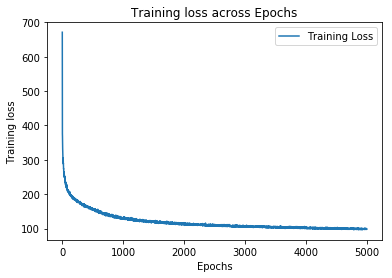

In [57]:
network.summary()
#print(network.history.keys())
historyObj=network.history.__dict__["history"]


historyObj
##This 
# "Loss"
plt.plot(historyObj['loss'])
#plt.plot(historyObj['val_loss'])
plt.title('Training loss across Epochs')
plt.ylabel('Training loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss'], loc='upper right')
plt.show()